In [9]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'az-handwritten-alphabets-in-csv-format:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F9726%2F17999%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240312%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240312T093757Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da828a1c58b5b0c95ffa0737e833575f257fc88836b462dd7d10eb556121b095743b2cfb0f66758c25422dc3a9d677d979d636d4db73f20b9153c12ae87dac80e8b932a99c1082073a1011a37386a09ffda3b6d891b6d0fbb60c43c06d6697740037091f5ca0d34fc32106460ffe8e0a5a5ae6397127ab0e6b662459ead1c31c86b4f7c22d2492390053e27bba4ce87f6661c00f6202cec67e9a9cc1051b5acd8ac328c420198fbf9482919354903c72703db9ac5db30cdb9d75a876ae35a9e41bc773d3dcd78232cb36908875246f10004c1270753f826909fe723fa3da27d16004f571f41295e6cb0debf33248e6f1fd87f0a4d0e5b380cc8392c2574a8b4fe,customclasses:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4464838%2F7819144%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240312%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240312T093757Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D27bb37b9f5acf77e64533b9ff06c8780a342b050b5cf188db1be65be92457409adce4eb5f0e4e02c1abb471e2214825c4789cf411250a82b41659d1e761acc5ad3047b06eaa110a3770811a399aaa2af02da582d582c1992804a791c8b4a4e8fdef67b7f41e97d11eeb97a143e82d4bac050d3d5c5e488672ec6cd7bfbaa10c0ac1bb20e0b61da4646f5903c42b2e5ee7a545b521a6b3c831bacb18524fa690ad1b50ac48448400b370604b2a4da591d765c3bf5cff741c11591f9abff6a607023bf108fc3e5b032d58cc67ceee5a9d70a7d0266d510a9bac3ca1ff2be96cc356f7385e95649ea72b44e0b36496dcb6095fa15476e3eb64dfdcc2ed3d7990b7b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 193643888 bytes downloaded
Downloaded and uncompressed: az-handwritten-alphabets-in-csv-format
[==================================================] 8587 bytes downloaded
Downloaded and uncompressed: customclasses
Data source import complete.


In [10]:
#import keras
#from keras import layers
import re, os, time

custom_dir = os.path.join('/kaggle/input', 'customclasses')
if custom_dir not in os.sys.path:
    os.sys.path.insert(0, custom_dir)

# Import all custom variables and modules
from preprocessing import *
from ae import *

RND_STATE = 247
keras.utils.set_random_seed(RND_STATE)

# Autoencoders

### Load data

In [11]:
# Hand-written alphabet images
if 'letters' not in dir():
    letters = MNIST_letters(
        '/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv'
    )

# Preprocessing and normalization
(x_train, train_labels), (x_test, test_labels), (x_val, val_labels) = \
    letters.split_data(train_ratio=5./9,val_ratio=0.2, random_state=RND_STATE)

x_train = letters.normalize(x_train)
x_test = letters.normalize(x_test)
x_val = letters.normalize(x_val)
img_shape = x_train.shape[1:]

y_train = letters.get_labels(x_train) # set pixels to binary 0/1 values
y_test = letters.get_labels(x_test)
y_val = letters.get_labels(x_val)

print("Shape of dataset: {}".format(str(letters.df.shape)))
print("Shape of training data: {}".format(str(x_train.shape)))
print("Shape of validation data: {}".format(str(x_val.shape)))
print("Shape of test data: {}".format(str(x_test.shape)))

Shape of dataset: (144013, 784)
Shape of training data: (64005, 28, 28, 1)
Shape of validation data: (16002, 28, 28, 1)
Shape of test data: (64006, 28, 28, 1)


In [12]:
# Model configurations
conf = model_config()
conf.config('compile')

es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

conf.config(
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(x_val, y_val),
    callbacks=[es_callback]
)

### 1. Dense Autoencoders

In [13]:
model = AE_dense(img_shape=img_shape, depth=3)
model.autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 encode_2 (Dense)            (None, 128)               100480    
                                                                 
 encode_1 (Dense)            (None, 64)                8256      
                                                                 
 encode_0 (Dense)            (None, 32)                2080      
                                                                 
 decode_1 (Dense)            (None, 64)                2112      
                                                                 
 decode_2 (Dense)            (None, 128)               

In [14]:
model.autoencoder.compile(**conf.compile_args)


conf.config(x=x_train, y=y_train)

start = time.time()

history = model.autoencoder.fit(**conf.training_args)

print('training elapsed time: ___{:5.2f} minutes___'.format((time.time()-start) / 60))

training elapsed time: ___ 0.73 minutes___


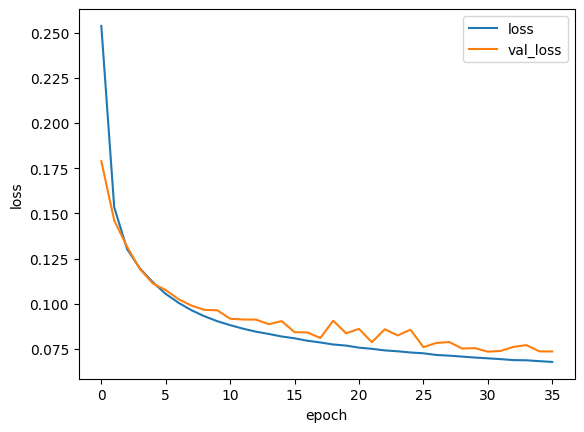

In [15]:
show_convergence(history, metrics=['loss','val_loss'])

In [16]:
decoded_imgs = model.predict(x_test)

model.evaluate_sklearn(y_test,decoded_imgs, threshold=0.5, report=True)

2001/2001 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98  43473626
           1       0.87      0.89      0.88   6707078

    accuracy                           0.97  50180704
   macro avg       0.93      0.94      0.93  50180704
weighted avg       0.97      0.97      0.97  50180704



{'Avg-precision': 0.96, 'f1-score-ODS': 0.88, 'f1-score-OIS': 0.88}

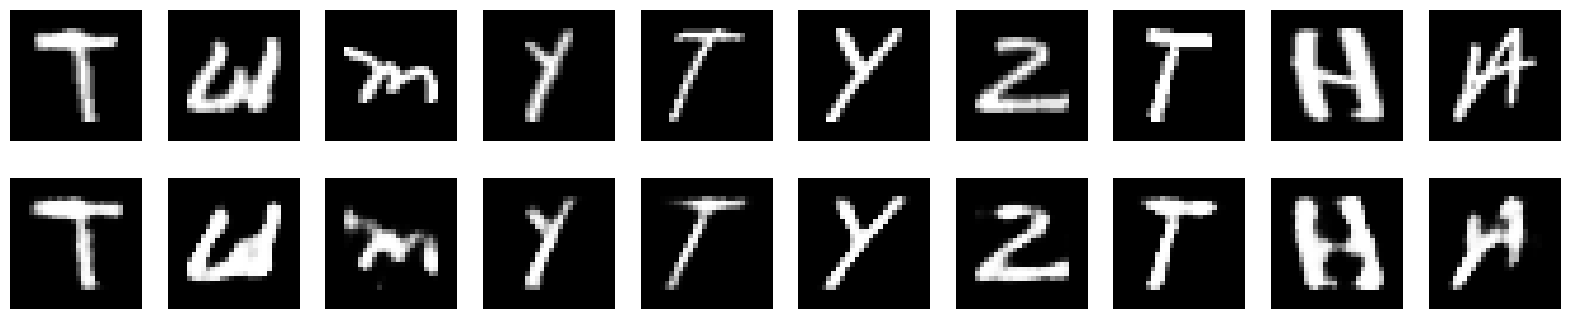

In [17]:
display_sample_images(x_test, decoded_imgs, img_shape[:-1])


### 2. ___Convolutional Autoencoders___

In [18]:
model2 = AE_convolutional(img_shape=img_shape, panel_size=[16, 8, 8])
model2.autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 Conv2D_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 encode_2 (MaxPooling2D)     (None, 14, 14, 16)        0         
                                                                 
 Conv2D_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 encode_1 (MaxPooling2D)     (None, 7, 7, 8)           0         
                                                                 
 Conv2DT_0 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 decode_0 (UpSampling2D)     (None, 14, 14, 8)         

In [19]:
model2.autoencoder.compile(**conf.compile_args)

conf.config( x=x_train, y=y_train )

start = time.time()

history = model2.autoencoder.fit( **conf.training_args )

print('train time: {:5.2f}___minutes___'.format((time.time()-start) / 60))

train time:  1.62___minutes___


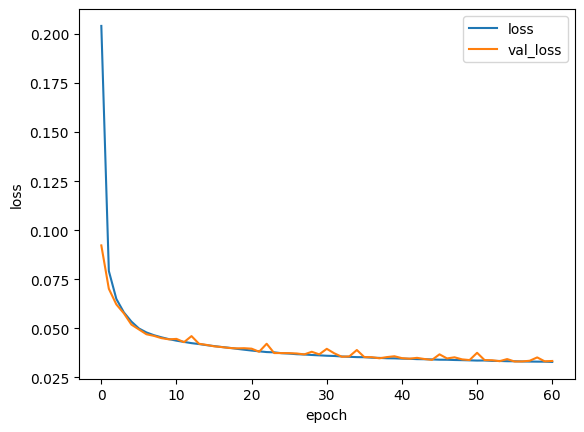

In [20]:
show_convergence(history, metrics=['loss','val_loss'])

In [21]:
decoded_imgs = model2.predict(x_test)

model2.evaluate_sklearn(y_test, decoded_imgs, threshold=0.5, report=True)

2001/2001 [==============================] - 5s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99  43473626
           1       0.94      0.95      0.95   6707078

    accuracy                           0.99  50180704
   macro avg       0.97      0.97      0.97  50180704
weighted avg       0.99      0.99      0.99  50180704



{'Avg-precision': 0.99, 'f1-score-ODS': 0.95, 'f1-score-OIS': 0.95}

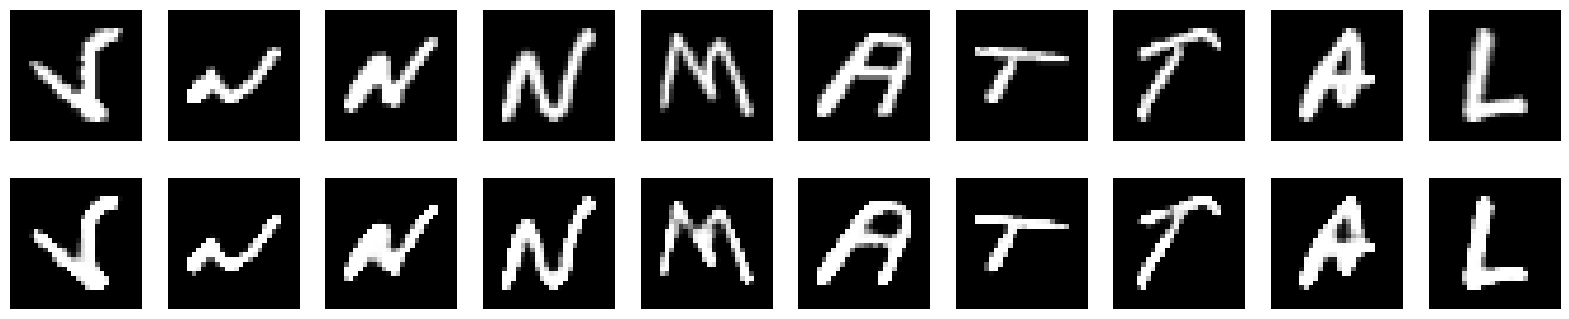

In [22]:
display_sample_images(x_test, decoded_imgs, img_shape)

### 3. Variational Autoencoders

In [23]:
model3 = AE_variational(img_shape=img_shape, panel_size=[32,32], latent_dim=32)
model3.autoencoder.summary()

Model: "autoencoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 Conv2D_1 (Conv2D)           (None, 28, 28, 32)           320       ['inputs[0][0]']              
                                                                                                  
 encode_1 (MaxPooling2D)     (None, 14, 14, 32)           0         ['Conv2D_1[0][0]']            
                                                                                                  
 Conv2D_0 (Conv2D)           (None, 14, 14, 32)           9248      ['encode_1[0][0]']            
                                                                                        

In [24]:
model3.compile(**conf.compile_args)

es_callback = keras.callbacks.EarlyStopping(
    monitor="val_reconstruction_loss",
    patience=5,
    verbose=0,
    restore_best_weights=True,
    mode='min'
)

conf.config( x=x_train, y=y_train, callbacks=[es_callback] )

start = time.time()

history = model3.fit( **conf.training_args )

print('train time: {:5.2f}___minutes___'.format((time.time()-start) / 60))

train time:  1.87___minutes___


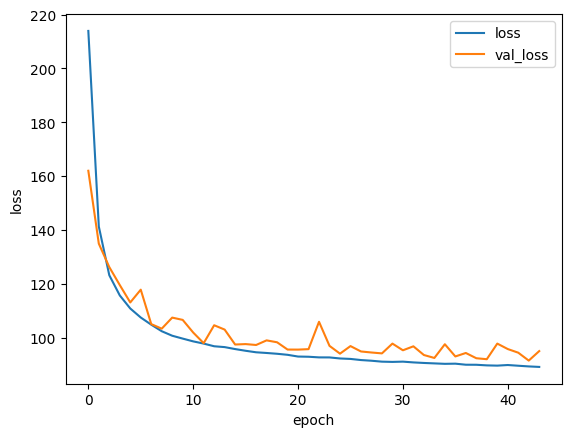

In [25]:
show_convergence(history, metrics=['loss','val_loss'])

In [26]:
decoded_imgs = model3.predict(x_test)

model3.evaluate_sklearn(y_test, decoded_imgs, threshold=0.5, report=True)

2001/2001 [==============================] - 5s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98  43473626
           1       0.85      0.87      0.86   6707078

    accuracy                           0.96  50180704
   macro avg       0.92      0.92      0.92  50180704
weighted avg       0.96      0.96      0.96  50180704



{'Avg-precision': 0.94, 'f1-score-ODS': 0.86, 'f1-score-OIS': 0.86}

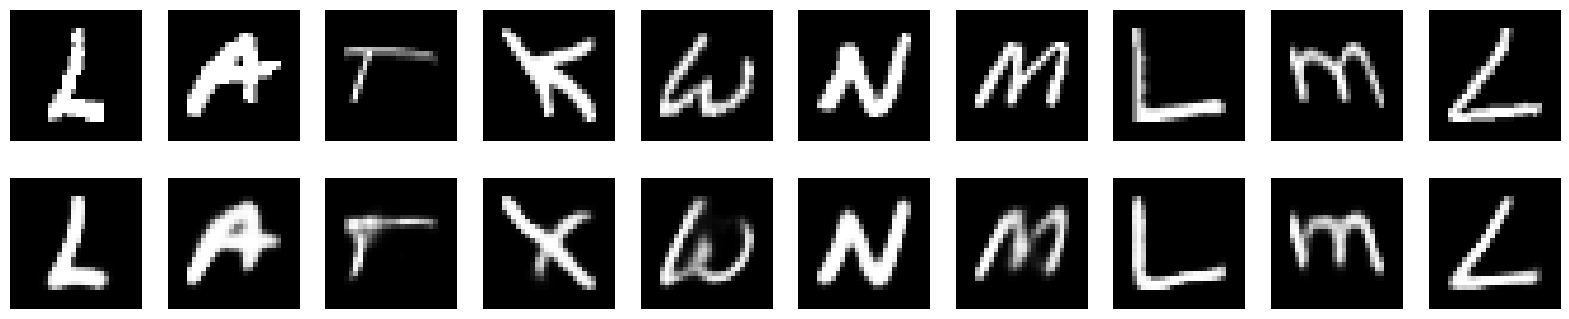

In [27]:
display_sample_images(x_test, decoded_imgs, img_shape)

### Repeat same model without the Sampling Layer

In [28]:
model4 = AE_variational(img_shape=img_shape, panel_size=[32,32], latent_dim=32, ARCH_NN='auto')
model4.autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 Conv2D_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 encode_1 (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 Conv2D_0 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 encode_0 (MaxPooling2D)     (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense_codes_0 (Dense)       (None, 16)                

In [29]:
model4.compile(**conf.compile_args)

conf.config( x=x_train, y=y_train, callbacks=[es_callback] )

start = time.time()

history = model4.fit( **conf.training_args )

print('train time: {:5.2f}___minutes___'.format((time.time()-start) / 60))

train time:  1.85___minutes___


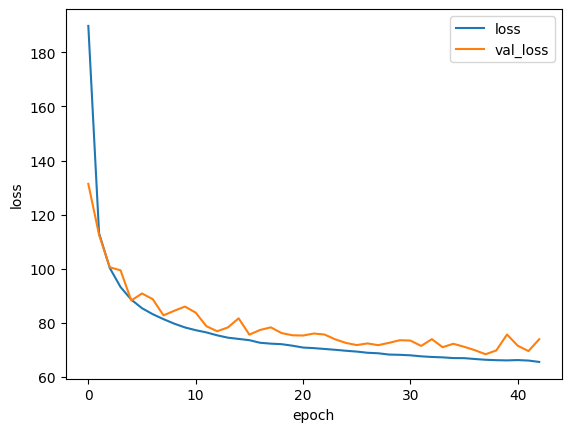

In [30]:
show_convergence(history, metrics=['loss','val_loss'])

In [31]:
decoded_imgs = model4.predict(x_test)

model4.evaluate_sklearn(y_test, decoded_imgs, threshold=0.5, report=True)

2001/2001 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98  43473626
           1       0.85      0.86      0.86   6707078

    accuracy                           0.96  50180704
   macro avg       0.92      0.92      0.92  50180704
weighted avg       0.96      0.96      0.96  50180704



{'Avg-precision': 0.94, 'f1-score-ODS': 0.86, 'f1-score-OIS': 0.86}

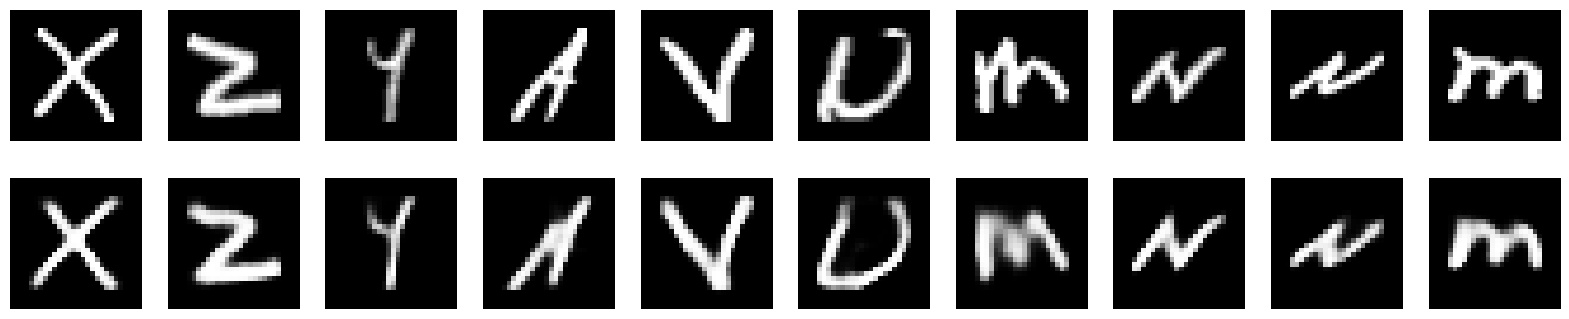

In [32]:
display_sample_images(x_test, decoded_imgs, img_shape)